# Introduction
    
Due to rapid growth in field of cashless or digital 
transactions, credit cards are widely used in all 
around the world. Credit cards providers are 
issuing thousands of cards to their customers.
 Providers have to ensure all the credit card users 
should be genuine and real. Any mistake in issuing 
a card can be reason of financial crises. 
Due to rapid growth in cashless transaction,
 the chances of number of fraudulent transactions can also increasing.
 A Fraud transaction can be identified by analyzing various
 behaviors of credit card customers from previous 
transaction history datasets. If any deviation
 is noticed in spending behavior from available patterns, 
it is possibly of fraudulent transaction. 
Data mining and machine learning techniques are widely used in credit card 
fraud detection. In this article we are presenting review 
of various data mining and machine learning methods
 which are widely used for credit card fraud detections and  complete this project end to end from Data Understanding to deploy Model via API .  
    
    
 

<a id=0></a>
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background:#1777C4; border:0' role="tab" aria-controls="home">

<center>CRISP-DM Methodology</center></h3>

* [Buissness Understanding](#1)
* [Data Understanding](#2)
* [Data Preparation](#3)
* [Data Modeling](#4)   
* [Data Evaluation](#5)
    

In this section we overview our selected method for engineering our solution. CRISP-DM stands for Cross-Industry Standard Process for Data Mining. It is an open standard guide that describes common approaches that are used by data mining experts. CRISP-DM includes descriptions of the typical phases of a project, including tasks details and provides an overview of the data mining lifecycle. The lifecycle model consists of six phases with arrows indicating the most important and frequent dependencies between phases. The sequence of the phases is not strict. In fact, most projects move back and forth between phases as necessary. It starts with business understanding, and then moves to data understanding, data preparation, modelling, evaluation, and deployment. The CRISP-DM model is flexible and can be customized easily.
## Buissness Understanding

    Tasks:

    1.Determine business objectives

    2.Assess situation

    3.Determine data mining goals

    4.Produce project plan

## Data Understanding
     Tasks:

    1.Collect data

    2.Describe data

    3.Explore data    

## Data Preparation
    
    Tasks:
    
    1.Data selection

    2.Data preprocessing

    3.Feature engineering

    4.Dimensionality reduction

            Steps:

            Data cleaning

            Data integration

            Data sampling

            Data dimensionality reduction

            Data formatting

            Data transformation

            Scaling

            Aggregation

            Decomposition

## Data Modeling :

Modeling is the part of the Cross-Industry Standard Process for Data Mining (CRISP-DM) process model that i like best. Our data is already in good shape, and now we can search for useful patterns in our data.

   Tasks:
    
    1. Select modeling technique Select technique

    2. Generate test design

    3. Build model

    4. Assess model

## Data Evaluation :
    
    Tasks:

    1.Evaluate Result

    2.Review Process

    3.Determine next steps

<a id=1></a>
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background:#1777C4; border:0' role="tab" aria-controls="home">
<center>Buissness Understanding</center></h3>


There may be two types of questions:

**A.Technical Questions:**
  
Can ML be a solution to the problem?

    
                Do we have THE data?
                Do we have all necessary related data?
                Is there enough amount of data to develop algorithm?
                Is data collected in the right way?
                Is data saved in the right format?
                Is the access to information guaranteed?

Can we satisfy all the Business Questions by means of ML?

**B.Business Questions:**
    
What are the organization's business goals?
    
                To reduce cost and increase revenue? 
                To increase efficiencies?
                To avoid risks? To improve quality?
    
Is it worth to develop ML?
    
                In short term? In long term?
                What are the success metrics?
                Can we handle the risk if the project is unsuccessful?
    
Do we have the resources?
    
                Do we have enough time to develop ML?
                Do we have a right talented team?


    
WE are provided a synthetic dataset for a mobile payments application. In this dataset, you are provided the sender and recipient of a transaction as well as whether transactions are tagged as fraud or not fraud. Your task is to build a fraud detection API that can be called to predict whether or not a transaction is fraudulent.
You can download the dataset here:https://www.kaggle.com/bannourchaker/frauddetection
    
You are expected to build a REST API that predicts whether a given transaction is fraudulent or not. You are also to assume that the previous API calls are to be stored in order to engineer
features relevant to finding fraud. The API calls will include the time step of the transaction, so you can assume that a transaction happens sequentially within the same time step.
For example, if I make the following transactions in the same time step:  
    

    
The first transaction is unlikely to be fraudulent, since anon is initiating a normal transfer.
However, multiple successive transfers of the same amount in the same hour is potentially fraudulent, since anon’s account might have been taken over by a fraudster. On the first API call,your model is unlikely to classify the transaction as fraudulent. However, on the fifth call, it’s likely that it will be tagged as fraudulent.
The REST API only has 1 endpoint /is-fraud that takes in a POST request:
    
The body is expected to receive the following fields(which are also the fields that can be found in your dataset:
The following is a sample body when making a POST request to your
    
    
            {
        "step":1,
        "type":"PAYMENT",
        "amount":9839.64,
        "nameOrig":"C1231006815",
        "oldbalanceOrig":170136.0,
        "newbalanceOrig":160296.36,
        "nameDest":"M1979787155",
        "oldbalanceDest":0.0,
        "newbalanceDest":0.0
        }
    
    
Your API is expected to return a JSON object with a boolean field isFraud. You may find a
sample response below:
    
    {"isFraud": true}
    
**summary:**
we are expecting the following:
    
- 1. Deployed REST API:
    
    a. As mentioned above, we would need an API that takes in a POST request for the
    /is-fraud url and returns a prediction on whether or not a transaction is
    fraudulent.
    
    b. Your REST API should be public for us to call the API and evaluate the accuracy
    of your model
    
    c. Given the nature of the data, your REST API will likely need to take into account
    previous transactions, so make sure it is able to take note of transactions from
    your training dataset as well as previous API calls.

- 2. Model
    
    a. We are expecting a machine learning model that can correctly classify whether or
    not a transaction is fraudulent.

**What is the objective of the machine learning model?**

We aim to predict  the real transactions fraud  and the fraud estimated by our model. We will evaluate model performance with the:

   - F beta score
    
   - ROC AUC score
    
   - PR AUC score | Average precision
    
    
## Step 1: Import helpful libraries

In [1]:
#Load the librarys
import pandas as pd #To work with dataset
import numpy as np #Math library
import matplotlib.gridspec as gridspec
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
import warnings
# Preparation  
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer, StandardScaler,Normalizer,RobustScaler,MaxAbsScaler,MinMaxScaler,QuantileTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import KBinsDiscretizer
# Import StandardScaler from scikit-learn

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer,IterativeImputer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import make_column_transformer,ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline,FeatureUnion
from sklearn.manifold import TSNE
# Import train_test_split()
# Metrics
from sklearn.metrics import roc_auc_score, average_precision_score,accuracy_score
from sklearn.metrics import make_scorer,f1_score,precision_score,recall_score
from sklearn.metrics import mean_squared_error,classification_report
from sklearn.metrics import roc_curve,confusion_matrix
from datetime import datetime, date
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.linear_model import LogisticRegression

#import tensorflow as tf 
#from tensorflow.keras import layers
#from tensorflow.keras.callbacks import EarlyStopping
#from tensorflow.keras.callbacks import LearningRateScheduler
#import smogn
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
# For training random forest model
import lightgbm as lgb
from scipy import sparse
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 
# Model selection
from sklearn.model_selection import StratifiedKFold,TimeSeriesSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, GroupKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
# Feature Selection 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression,f_classif,chi2
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import mutual_info_classif,VarianceThreshold
from lightgbm import LGBMClassifier,LGBMRegressor
from catboost import CatBoostRegressor, CatBoostClassifier
from xgboost import XGBClassifier,XGBRegressor
from sklearn import set_config
from itertools import combinations
# Cluster :
from sklearn.cluster import MiniBatchKMeans
#from yellowbrick.cluster import KElbowVisualizer
#import smong 
import category_encoders as ce
import warnings
import optuna 
from joblib import Parallel, delayed
import joblib 
from sklearn import set_config
from typing import List, Optional, Union
set_config(display='diagram')
warnings.filterwarnings('ignore')


## Step 2: Load the data
Complete guid to read data : 
Next, we'll load the training and test data.

In [2]:
%%time
# import lux
# Load the training data
train = pd.read_csv("../input/frauddetection/transactions_train.csv")
# Preview the data
train.head(3)

CPU times: user 10 s, sys: 1.94 s, total: 12 s
Wall time: 15.4 s


,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1



<a id=2></a>
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background:#1777C4; border:0' role="tab" aria-controls="home">
<center>Data Understanding</center></h3>


### Explore the data/Analysis 

We will analyse the following:

    The target variable
    
    Variable types (categorical and numerical)
    
    Numerical variables
        Discrete
        Continuous
        Distributions
        Transformations

    Categorical variables
        Cardinality
        Rare Labels
        Special mappings

    Null Data

    Text data 
    
    wich columns will we use
    
    IS there outliers that can destory our algo
    
    IS there diffrent range of data
    
    Curse of dimm...
    
This Step is done here : [https://www.kaggle.com/bannourchaker/frauddetection-part1-eda/edit](http://)

# Convert Dtypes :

In [3]:
# Convert Dtypes :
train[train.select_dtypes(['int64','int16','float32','float64','int8']).columns] = train[train.select_dtypes(['int64','int16','float32','float64','int8']).columns].apply(pd.to_numeric)
train[train.select_dtypes(['object','category']).columns] = train.select_dtypes(['object','category']).apply(lambda x: x.astype('category'))

## Define the model features and target

### Extract X and y 

In [4]:
# Pour le train test
target= "isFraud"
X = train.drop(target, axis='columns').iloc[0:500000,:]# axis=1
y = train[target].iloc[0:500000]
del train 

# What should we do for each colmun

**Separate features by dtype**

Next we’ll separate the features in the dataframe by their datatype. There are a few different ways to achieve this. I’ve used the select_dtypes() function to obtain specific data types by passing in np.number to obtain the numeric data and exclude=['np.number'] to return the categorical data. Appending .columns to the end returns an Index list containing the column names. For the categorical features, we don’t want to include the target income column, so I’ve dropped that.

**Cat Features**





In [5]:
# select non-numeric columns
cat_columns = X.select_dtypes(exclude=['int64','int16','float32','float64','int8']).columns

**Num Features**



In [6]:
# select the float columns
num_columns = X.select_dtypes(include=['int64','int16','float32','float64','int8']).columns

In [7]:
all_columns = (num_columns.append(cat_columns))
print(cat_columns)
print(num_columns)
print(all_columns)

Index(['type', 'nameOrig', 'nameDest'], dtype='object')
Index(['step', 'amount', 'oldbalanceOrig', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest'],
      dtype='object')
Index(['step', 'amount', 'oldbalanceOrig', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'type', 'nameOrig', 'nameDest'],
      dtype='object')


# check that we have all column

In [8]:
if set(all_columns) == set(X.columns):
    print('Ok')
else:
    # Let's see the difference 
    print('in all_columns but not in  train  :', set(all_columns) - set(X.columns))
    print('in X.columns   but not all_columns :', set(X.columns) - set(all_columns))

Ok


<a id=3></a>
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background:#1777C4; border:0' role="tab" aria-controls="home">
<center>Data Preparation</center></h3>


## Data preprocessing

Data preprocessing comes after you've cleaned up your data and after you've done some exploratory analysis to understand your dataset. Once you understand your dataset, you'll probably have some idea about how you want to model your data. Machine learning models in Python require numerical input, so if your dataset has categorical variables, you'll need to transform them. Think of data preprocessing as a prerequisite for modeling.
This Step is Done Here :
[https://www.kaggle.com/bannourchaker/frauddetection-part2-preparation/edit](http://)



In [9]:
class ColumnsSelector(BaseEstimator, TransformerMixin):
    def __init__(self, positions):
        self.positions = positions

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        #return np.array(X)[:, self.positions]
        return X.loc[:, self.positions] 
########################################################################
class CustomLogTransformer(BaseEstimator, TransformerMixin):
    # https://towardsdatascience.com/how-to-write-powerful-code-others-admire-with-custom-sklearn-transformers-34bc9087fdd
    def __init__(self):
        self._estimator = PowerTransformer()

    def fit(self, X, y=None):
        X_copy = np.copy(X) + 1
        self._estimator.fit(X_copy)

        return self

    def transform(self, X):
        X_copy = np.copy(X) + 1

        return self._estimator.transform(X_copy)

    def inverse_transform(self, X):
        X_reversed = self._estimator.inverse_transform(np.copy(X))

        return X_reversed - 1  

class TemporalVariableTransformer(BaseEstimator, TransformerMixin):
    # Temporal elapsed time transformer

    def __init__(self, variables, reference_variable):
        
        if not isinstance(variables, list):
            raise ValueError('variables should be a list')
        
        self.variables = variables
        self.reference_variable = reference_variable

    def fit(self, X, y=None):
        # we need this step to fit the sklearn pipeline
        return self

    def transform(self, X):

       # so that we do not over-write the original dataframe
        X = X.copy()
        
        for feature in self.variables:
            X[feature] = X[self.reference_variable] - X[feature]

        return X
class CustomImputer(BaseEstimator, TransformerMixin) : 
    def __init__(self, variable, by) : 
            #self.something enables you to include the passed parameters
            #as object attributes and use it in other methods of the class
            self.variable = variable
            self.by = by

    def fit(self, X, y=None) : 
        self.map = X.groupby(self.by)[variable].mean()
        #self.map become an attribute that is, the map of values to
        #impute in function of index (corresponding table, like a dict)
        return self

def transform(self, X, y=None) : 
    X[variable] = X[variable].fillna(value = X[by].map(self.map))
    #Change the variable column. If the value is missing, value should 
    #be replaced by the mapping of column "by" according to the map you
    #created in fit method (self.map)
    return X

    # categorical missing value imputer
class Mapper(BaseEstimator, TransformerMixin):

    def __init__(self, variables, mappings):

        if not isinstance(variables, list):
            raise ValueError('variables should be a list')

        self.variables = variables
        self.mappings = mappings

    def fit(self, X, y=None):
        # we need the fit statement to accomodate the sklearn pipeline
        return self

    def transform(self, X):
        X = X.copy()
        for feature in self.variables:
            X[feature] = X[feature].map(self.mappings)

        return X  
    
##########################################################################
class CountFrequencyEncoder(BaseEstimator, TransformerMixin):
    #temp = df['card1'].value_counts().to_dict()
    #df['card1_counts'] = df['card1'].map(temp)
    def __init__(
        self,
        encoding_method: str = "count",
        variables: Union[None, int, str, List[Union[str, int]]] = None,
        keep_variable=True,
                  ) -> None:

        self.encoding_method = encoding_method
        self.variables = variables
        self.keep_variable=keep_variable

    def fit(self, X: pd.DataFrame, y: Optional[pd.Series] = None):
        """
        Learn the counts or frequencies which will be used to replace the categories.
        Parameters
        ----------
        X: pandas dataframe of shape = [n_samples, n_features]
            The training dataset. Can be the entire dataframe, not just the
            variables to be transformed.
        y: pandas Series, default = None
            y is not needed in this encoder. You can pass y or None.
        """
        self.encoder_dict_ = {}

        # learn encoding maps
        for var in self.variables:
            if self.encoding_method == "count":
                self.encoder_dict_[var] = X[var].value_counts().to_dict()

            elif self.encoding_method == "frequency":
                n_obs = float(len(X))
                self.encoder_dict_[var] = (X[var].value_counts() / n_obs).to_dict()
        return self

    def transform(self, X: pd.DataFrame) -> pd.DataFrame:
        # replace categories by the learned parameters
        X = X.copy()
        for feature in self.encoder_dict_.keys():
            if self.keep_variable:
                X[feature+'_fq_enc'] = X[feature].map(self.encoder_dict_[feature])
            else:
                X[feature] = X[feature].map(self.encoder_dict_[feature])
        return X[self.variables].to_numpy()
#################################################   
class FeaturesEngineerGroup(BaseEstimator, TransformerMixin):
    def __init__(self,groupping_method ="mean",
                   variables=  "amount",
                   groupby_variables = "nameOrig"                         
                 ) :
        self.groupping_method = groupping_method
        self.variables=variables
        self.groupby_variables=groupby_variables
        
    def fit(self, X, y=None):
        """
        Learn the mean or median of  amount of each client which will be used to create new feature for each unqiue client in order to undersatant thier behavior .
        Parameters
        ----------
        X: pandas dataframe of shape = [n_samples, n_features]
        The training dataset. Can be the entire dataframe, not just the
        variables to be transformed.
        y: pandas Series, default = None
        y is not needed in this encoder. You can pass y or None.
        """
        self.group_amount_dict_ = {}
        #df.groupby('card1')['TransactionAmt'].agg(['mean']).to_dict()
        #temp = df.groupby('card1')['TransactionAmt'].agg(['mean']).rename({'mean':'TransactionAmt_card1_mean'},axis=1)
        #df = pd.merge(df,temp,on='card1',how='left')
        #target_mean = df_train.groupby(['id1', 'id2'])['target'].mean().rename('avg')
        #df_test = df_test.join(target_mean, on=['id1', 'id2'])
        #lifeExp_per_continent = gapminder.groupby('continent').lifeExp.mean()
        # learn mean/medain 
        #for groupby in self.groupby_variables:
         #   for var in self.variables:
        if self.groupping_method == "mean":
            self.group_amount_dict_[self.variables] =X.fillna(np.nan).groupby([self.groupby_variables])[self.variables].agg(['mean']).to_dict()
        elif self.groupping_method == "median":
            self.group_amount_dict_[self.variables] =X.fillna(np.nan).groupby([self.groupby_variables])[self.variables].agg(['median']).to_dict()
        else:
            print('error , chose mean or median')
        return self
    
    def transform(self, X: pd.DataFrame) -> pd.DataFrame:
        X = X.copy()
        #for col in self.variables:
         #   for agg_type in self.groupping_method:
        new_col_name =  self.variables+'_Transaction_'+ self.groupping_method
        X[new_col_name] = X[self.groupby_variables].map(self.group_amount_dict_[ self.variables][self.groupping_method])
        return X[new_col_name].to_numpy().reshape(-1,1)    
    
################################################   
class FeaturesEngineerGroup2(BaseEstimator, TransformerMixin):
    def __init__(self,groupping_method ="mean",
                   variables=  "amount",
                   groupby_variables = "nameOrig"                         
                 ) :
        self.groupping_method = groupping_method
        self.variables=variables
        self.groupby_variables=groupby_variables
        
    def fit(self, X, y=None):
        """
        Learn the mean or median of  amount of each client which will be used to create new feature for each unqiue client in order to undersatant thier behavior .
        Parameters
        ----------
        X: pandas dataframe of shape = [n_samples, n_features]
        The training dataset. Can be the entire dataframe, not just the
        variables to be transformed.
        y: pandas Series, default = None
        y is not needed in this encoder. You can pass y or None.
        """
        X = X.copy()
        self.group_amount_dict_ = {}
        #df.groupby('card1')['TransactionAmt'].agg(['mean']).to_dict()
        #temp = df.groupby('card1')['TransactionAmt'].agg(['mean']).rename({'mean':'TransactionAmt_card1_mean'},axis=1)
        #df = pd.merge(df,temp,on='card1',how='left')
        #target_mean = df_train.groupby(['id1', 'id2'])['target'].mean().rename('avg')
        #df_test = df_test.join(target_mean, on=['id1', 'id2'])
        #lifeExp_per_continent = gapminder.groupby('continent').lifeExp.mean()
        # learn mean/medain 
        #for groupby in self.groupby_variables:
         #   for var in self.variables:

        print('we have {} unique clients'.format(X[self.groupby_variables].nunique()))
        new_col_name =  self.variables+'_Transaction_'+ self.groupping_method    
        X[new_col_name] = X.groupby([self.groupby_variables])[[self.variables]].transform(self.groupping_method)
        X = X.drop_duplicates(['nameOrig'])
    
        self.group_amount_dict_ = dict(zip(X[self.groupby_variables], X[new_col_name]))
        del X
        #print('we have {} unique mean amount : one for each client'.format(len(self.group_amount_dict_)))
        return self
    
    def transform(self, X: pd.DataFrame) -> pd.DataFrame:
        X = X.copy()
        #for col in self.variables:
         #   for agg_type in self.groupping_method:
        new_col_name =  self.variables+'_Transaction_'+ self.groupping_method
        X[new_col_name] = X[self.groupby_variables].map(self.group_amount_dict_)
        return X[new_col_name].to_numpy().reshape(-1,1)   
    
############################################  
class FeaturesEngineerCumCount(BaseEstimator, TransformerMixin):
    def __init__(self,group_one ="step",
                   group_two=  "nameOrig"                       
                 ) :
        self.group_one =group_one
        self.group_two=group_two
        
    def fit(self, X, y=None):
        """
        """
        return self
    
    def transform(self, X: pd.DataFrame) -> pd.DataFrame:
        X = X.copy()
        new_col_name =  self.group_two+'_Transaction_count'
        X[new_col_name] = X.groupby([self.group_one, self.group_two])[[self.group_two]].transform('count')
        return X[new_col_name].to_numpy().reshape(-1,1)

# Advanced Pipe :
This pipe include features engineer+ some advanced preprocessing steps for each columns.

In [10]:
# complete pipe :
# select the float/cat columns
#cat_feautres = X.select_dtypes(include=['object','category']).columns
#num_features = X.select_dtypes(exclude=['object','category']).columns
#Define vcat pipeline
features_cum_count=['step','nameOrig']
features_groupby_amount=['amount','nameOrig']
features_frequency_orig_dest=['nameOrig','nameDest']
features_cum_count_pipe = Pipeline([
                     ('transformer_Encoder', FeaturesEngineerCumCount())
                    ])
features_groupby_pipe = Pipeline([
                     ('transformer_group_amount_mean', FeaturesEngineerGroup2()),
                     ('transformer_group_scaler', PowerTransformer())
                    ])
features_frequency_pipe = Pipeline([
                     ('Encoder', CountFrequencyEncoder(variables=['nameOrig','nameDest'],encoding_method ="frequency", keep_variable=False))
                    ])
type_pipe= Pipeline([
                     ('transformer_Encoder', ce.cat_boost.CatBoostEncoder())
                    ])
num_features0=[  'amount',  'oldbalanceOrig', 'newbalanceOrig' ,'oldbalanceDest', 'newbalanceDest']
#Define vnum pipeline
num_pipe = Pipeline([
                     ('scaler', PowerTransformer()),
                    ])
#Featureunion fitting training data
preprocessor = FeatureUnion(transformer_list=[('cum_count', features_cum_count_pipe),
                                              ('mean_amount', features_groupby_pipe),
                                              ('frequency_dest_orig', features_frequency_pipe),
                                              ('trans_type', type_pipe),
                                              ('num', num_pipe)])
data_preparing= ColumnTransformer([
    ('cum_count', features_cum_count_pipe, features_cum_count ),
    ('mean_amount', features_groupby_pipe, features_groupby_amount ),
    ('frequency_dest_orig', features_frequency_pipe, features_frequency_orig_dest ),
    ('trans_type', type_pipe, ['type'] ),
    ('num', num_pipe, num_features0)
], remainder='drop')
data_preparing

ColumnTransformer(transformers=[('cum_count',
                                 Pipeline(steps=[('transformer_Encoder',
                                                  FeaturesEngineerCumCount())]),
                                 ['step', 'nameOrig']),
                                ('mean_amount',
                                 Pipeline(steps=[('transformer_group_amount_mean',
                                                  FeaturesEngineerGroup2()),
                                                 ('transformer_group_scaler',
                                                  PowerTransformer())]),
                                 ['amount', 'nameOrig']),
                                ('frequency_dest_orig',
                                 Pipeline(steps=[('Encoder',
                                                  CountFrequencyEncoder(encoding_method='frequency',
                                                                        keep_variable=False,
                                                                        variables=['nameOrig',
                                                                                   'nameDest']))]),
                                 ['nameOrig', 'nameDest']),
                                ('trans_type',
                                 Pipeline(steps=[('transformer_Encoder',
                                                  CatBoostEncoder())]),
                                 ['type']),
                                ('num',
                                 Pipeline(steps=[('scaler',
                                                  PowerTransformer())]),
                                 ['amount', 'oldbalanceOrig', 'newbalanceOrig',
                                  'oldbalanceDest', 'newbalanceDest'])])

In [11]:
final_columns=['cum_count','mean_amount','frequency_Orig','frequency_Dest','trans_type',  'amount',  'oldbalanceOrig', 'newbalanceOrig' ,'oldbalanceDest', 'newbalanceDest']

<a id=4></a>
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background:#1777C4; border:0' role="tab" aria-controls="home">
<center>Modeling</center></h3>


Modeling is the part of the Cross-Industry Standard Process for Data Mining (CRISP-DM) process model that i like best. Our data is already in good shape, and now we can search for useful patterns in our data.

we have select the preprocess pipe  and we the best model and tune it .
Now it's time to get our complete evaluation  before we go to production .


In [12]:
param_lgbm1 ={'metric': 'auc',
             # "device_type" : "gpu",
              'boosting_type': 'gbdt',
              'lambda_l1': 1.363777251241345e-08,
              'lambda_l2': 4.62760154881154e-05,
              'num_leaves': 220,
              'n_estimators': 11544,
              'reg_alpha': 0.2364285339007138,
              'reg_lambda': 0.2640697497357361,
              'colsample_bytree': 1.0,
              'subsample': 0.7,
              'learning_rate': 0.014,
              'tree_method': "gpu_hist",
              'max_depth': 100, 
              'min_child_samples': 128,
              'min_data_per_groups': 36} 

model_lgbm1 = LGBMClassifier(
                        **param_lgbm1,
                       random_state = 0,
                      )

pipeline_model_lgbm1 = Pipeline([
        ('pre', data_preparing),
        ('estimator', model_lgbm1)
    ])
pipeline_model_lgbm1 

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('cum_count',
                                                  Pipeline(steps=[('transformer_Encoder',
                                                                   FeaturesEngineerCumCount())]),
                                                  ['step', 'nameOrig']),
                                                 ('mean_amount',
                                                  Pipeline(steps=[('transformer_group_amount_mean',
                                                                   FeaturesEngineerGroup2()),
                                                                  ('transformer_group_scaler',
                                                                   PowerTransformer())]),
                                                  ['amount', 'nameOrig']),
                                                 ('frequency_dest_orig',
                                                  Pipeli...
                                                   'newbalanceDest'])])),
                ('estimator',
                 LGBMClassifier(lambda_l1=1.363777251241345e-08,
                                lambda_l2=4.62760154881154e-05,
                                learning_rate=0.014, max_depth=100,
                                metric='auc', min_child_samples=128,
                                min_data_per_groups=36, n_estimators=11544,
                                num_leaves=220, random_state=0,
                                reg_alpha=0.2364285339007138,
                                reg_lambda=0.2640697497357361, subsample=0.7,
                                tree_method='gpu_hist'))])

# Train on all data 

In [13]:
%%time
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1,shuffle=False,random_state=7)
data_preparing.fit(X_train, y_train)
x_pre = data_preparing.transform(X_train)
x_test_pre =data_preparing.transform(X_test)
# pipeline_model_lgbm.fit(X,y)

we have 449959 unique clients
CPU times: user 1min 14s, sys: 3.37 s, total: 1min 18s
Wall time: 1min 18s


In [14]:
x_pre.shape

(450000, 10)

In [15]:
df_test_pre = pd.DataFrame(data=x_test_pre, columns=final_columns)
df_test_pre.head()

,cum_count,mean_amount,frequency_Orig,frequency_Dest,trans_type,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1.0,NaN,0.0,0.000013,0.000698,0.205323,-1.275247,-0.891402,0.854907,0.789744
1,1.0,NaN,0.0,0.000018,0.000698,0.862326,-1.275247,-0.891402,0.858326,0.778343
2,1.0,NaN,0.0,0.000004,0.000698,0.984339,-1.275247,-0.891402,0.895851,0.861151
3,1.0,NaN,0.0,0.000031,0.000698,0.965182,-1.275247,-0.891402,0.810214,0.790738
4,1.0,NaN,0.0,0.000002,0.000698,1.105550,-1.275247,-0.891402,1.618755,1.623010


In [16]:
df_test_pre.describe()

,cum_count,mean_amount,frequency_Orig,frequency_Dest,trans_type,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest
count,50000.000000,5.000000,5.000000e+04,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.000040,0.149113,2.222222e-10,0.000010,4.841744e-04,-0.083078,0.017523,0.032375,0.046255,0.040519
std,0.006324,1.109285,2.222133e-08,0.000015,7.600976e-04,0.948033,0.987323,0.997380,0.992689,0.972745
min,1.000000,-0.990735,0.000000e+00,0.000000,3.286648e-09,-3.266516,-1.275247,-0.891402,-1.162650,-1.211714
25%,1.000000,-0.871839,0.000000e+00,0.000000,3.286648e-09,-0.892889,-1.275247,-0.891402,-1.162650,-1.211714
50%,1.000000,0.054966,0.000000e+00,0.000004,4.996310e-09,0.079900,0.305667,-0.891402,0.557316,0.502307
75%,1.000000,1.155764,0.000000e+00,0.000016,6.982115e-04,0.665100,0.721341,1.065870,0.893566,0.837467
max,2.000000,1.397410,2.222222e-06,0.000198,2.870386e-03,4.213941,1.959580,1.516945,1.726621,1.748483


# Explain Our model:
It's an important phase to try to simplify things to majority of people and exlain your model.



In [17]:
%%time
model_lgbm1.fit(x_pre,y_train)

[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] Unknown parameter: min_data_per_groups
[LightGBM] [Warning] lambda_l1 is set=1.363777251241345e-08, reg_alpha=0.2364285339007138 will be ignored. Current value: lambda_l1=1.363777251241345e-08
[LightGBM] [Warning] lambda_l2 is set=4.62760154881154e-05, reg_lambda=0.2640697497357361 will be ignored. Current value: lambda_l2=4.62760154881154e-05
CPU times: user 12min 31s, sys: 3.06 s, total: 12min 34s
Wall time: 3min 12s


LGBMClassifier(lambda_l1=1.363777251241345e-08, lambda_l2=4.62760154881154e-05,
               learning_rate=0.014, max_depth=100, metric='auc',
               min_child_samples=128, min_data_per_groups=36,
               n_estimators=11544, num_leaves=220, random_state=0,
               reg_alpha=0.2364285339007138, reg_lambda=0.2640697497357361,
               subsample=0.7, tree_method='gpu_hist')

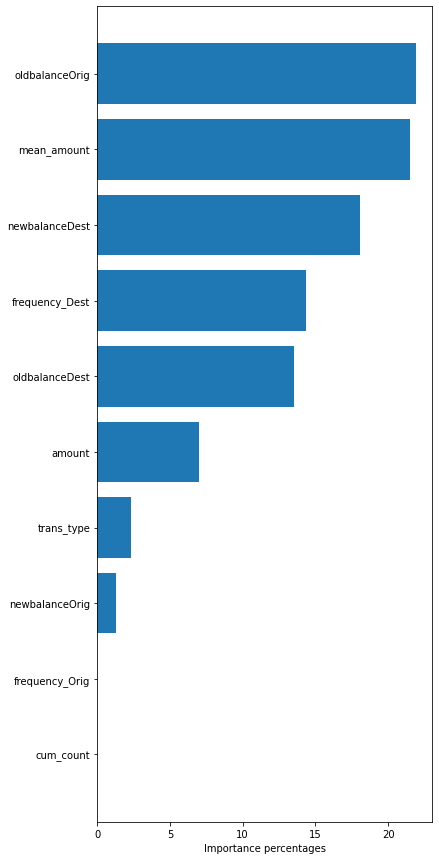

In [18]:
f, ax = plt.subplots(figsize=(6, 15))
feature_importances = (model_lgbm1.feature_importances_ / sum(model_lgbm1.feature_importances_)) * 100
results = pd.DataFrame({'Features': final_columns,
                        'Importances': feature_importances})
results.sort_values(by='Importances', inplace=True)

ax = plt.barh(results['Features'], results['Importances'])
plt.xlabel('Importance percentages')
plt.show()
#########################################

In [19]:
df_feature_importance = (
    pd.DataFrame({
        'feature': final_columns,
        'importance': model_lgbm1.feature_importances_,
    })
    .sort_values('importance', ascending=False)
)
df_feature_importance

,feature,importance
6,oldbalanceOrig,50739
1,mean_amount,49747
9,newbalanceDest,41826
3,frequency_Dest,33203
8,oldbalanceDest,31345
5,amount,16270
4,trans_type,5361
7,newbalanceOrig,2986
0,cum_count,0
2,frequency_Orig,0


we can see that this model give more importance to the behavior of client his mean amount and also if he will pay new destination .

**Explainable AI (XAI)** helps build trust and confidence in machine learning models by making them more transparent. XAI is a set of tools and frameworks that can be used to understand and interpret how a machine learning model makes decisions. One useful XAI tool is the SHAP library in Python. This tool allows us to quantify feature’s contribution towards a single prediction as well as predictions at an overall level. The library also comes with aesthetically pleasing easy-to-use visualisations.

Let's see shap value : 

**SHAP** is an approach based on a game theory to explain the output of machine learning models. It provides a means to estimate and demonstrate how each feature’s contribution influence the model. SHAP values are calculated for each feature, for each value present, and approximate the contribution towards the output given by that data point. It’s worth noting, that the same values of a feature can contribute different amounts towards an output, depending on the other feature values for that row.

This method approximates the individual contribution of each feature, for each row of data. It approximates the contribution of that feature by estimating the model output without using it versus all the models that do include it. As this is applied to each row of data in our training set, we can use this to observe both granular (row-level) and higher-level behaviours of certain features.
Shap value helps us quantify feature’s contribution towards a prediction. Shap value closer to zero means the feature contributes little to the prediction whereas shap value away from zero indicates the feature contributes more. 

Once we’ve fitted our model, and defined our SHAP method, we just need to use the below line to generate our first plot.

reference : 
https://towardsdatascience.com/explaining-scikit-learn-models-with-shap-61daff21b12a


In [20]:
import shap
# print the JS visualization code to the notebook
shap.initjs()

Here we use the Tree SHAP implementation integrated into Light GBM to explain the entire train set 


If you look carefully at the code where we created the SHAP values, you'll notice we reference Trees in shap.TreeExplainer(my_model). But the SHAP package has explainers for every type of model.

    shap.DeepExplainer works with Deep Learning models.
    shap.KernelExplainer works with all models, though it is slower than other Explainers and it offers an approximation rather than exact Shap values.


In [21]:
explainer = shap.TreeExplainer(model_lgbm1)


In [22]:
shap_values = explainer.shap_values(df_test_pre)

In [23]:
explainer.expected_value

[24.63818822120584, -24.63818822120584]

In [24]:
# visualize the first prediction's explanation
#shap.plots.waterfall( shap_values[1][0,:])

The shap_values object above is a list with two arrays. The first array is the SHAP values for a negative outcome , and the second array is the list of SHAP values for the positive outcome (Transactions is Fraud). We typically think about predictions in terms of the prediction of a positive outcome, so we'll pull out SHAP values for positive outcomes (pulling out shap_values[1]).


Shap values show how much a given feature changed our prediction (compared to if we made that prediction at some baseline value of that feature).

For example, consider an ultra-simple model:
y=4∗x1+2∗x2

If x1 takes the value 2, instead of a baseline value of 0, then our SHAP value for x1

would be 8 (from 4 times 2).

These are harder to calculate with the sophisticated models we use in practice. But through some algorithmic cleverness, Shap values allow us to decompose any prediction into the sum of effects of each feature value, yielding a graph like this:

It's cumbersome to review raw arrays, but the shap package has a nice way to visualize the results.

https://www.kaggle.com/dansbecker/advanced-uses-of-shap-values

**Visualize a single prediction**

Note that we use the “display values” data frame so we get nice strings instead of category codes.

In [25]:
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], df_test_pre.iloc[0,:])

The red features in the force plot drives our prediction to be 1: transactions will be fraud  . The bigger the arrow gets, the more effect that feature has on the prediction. Most contributing features are as follows:frequency_dest , oldbalance .

The blue features indicate features reducing the probability of the transactions will be fraud . like transactions type mean amount ...

**How do you interpret this?**

We predicted -24,91, whereas the base_value is  -24.6381. Feature values causing increased predictions are in pink, and their visual size shows the magnitude of the feature's effect. Feature values decreasing the prediction are in blue. The biggest impact comes from FranquencyDest and oldorigbalance . Though the trans type and old balncedest value has a meaningful effect decreasing the prediction.

If you subtract the length of the blue bars from the length of the pink bars, it equals the distance from the base value to the output.

In [26]:
# Get the index of elements with value 1
result = np.where(y_test == 1)
fraudvalue=result[0][0]

In [27]:
df_test_pre.iloc[fraudvalue,:].to_numpy()

array([ 1.        ,         nan,  0.        ,  0.        ,  0.00287039,
        0.47703154,  0.70184646, -0.89140236, -1.16265029, -1.21171352])

In [28]:
print("Test data (actual observation): {}".format(y_test.iloc[fraudvalue]))
preds=model_lgbm1.predict(df_test_pre.iloc[fraudvalue,:].to_numpy().reshape(1, -1))
print("Model's prediction: {}".format(preds))

Test data (actual observation): 1
Model's prediction: [1]


Let’s take a look at the decision plot for this transactions . Decision plots help us to see how model finalized its decision. It is very similar to force plots but easier to read. We can order features according to their importance for the model. We can even show more than one observation and highlight the specific ones among them (for example miscancellous predictions can be highlighted among all).

In [29]:
shap.force_plot(explainer.expected_value[1], shap_values[1][fraudvalue,:], df_test_pre.iloc[fraudvalue,:])

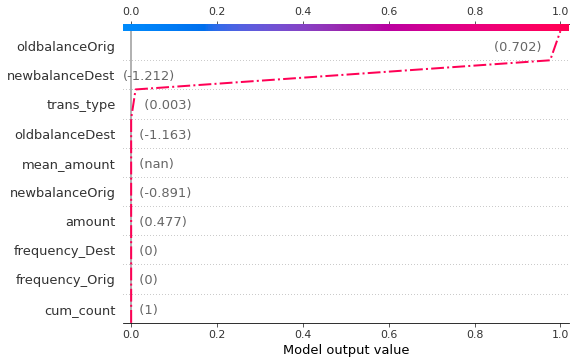

In [30]:
shap.decision_plot(explainer.expected_value[1], shap_values[1][fraudvalue,:], df_test_pre.iloc[fraudvalue,:],
                   link='logit', highlight=0)

Now that we examined the model from a local perspective, we can move onto the global explanations. Importance of our features are listed as follows.

**Summary Plots**

Permutation importance is great because it created simple numeric measures to see which features mattered to a model. This helped us make comparisons between features easily, and you can present the resulting graphs to non-technical audiences.

But it doesn't tell you how each features matter. If a feature has medium permutation importance, that could mean it has

    a large effect for a few predictions, but no effect in general, or
    a medium effect for all predictions.

SHAP summary plots give us a birds-eye view of feature importance and what is driving it. We'll walk through an example plot for the soccer data:

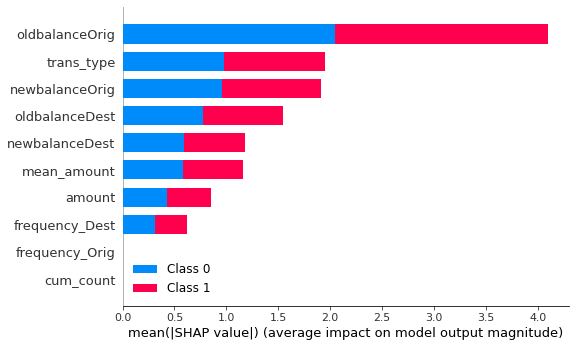

In [31]:
shap.summary_plot(shap_values, df_test_pre, plot_type='bar')

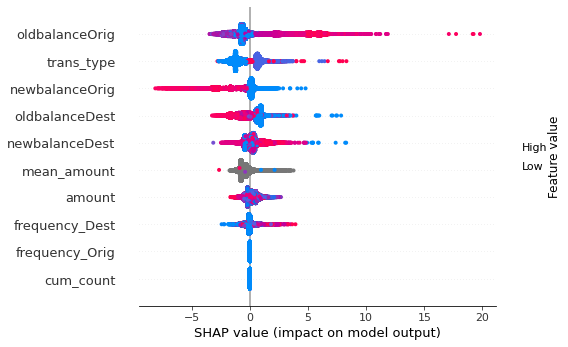

In [32]:
# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values[1], df_test_pre
                  #,use_log_scale=True
                 )

references: 

https://stackoverflow.com/questions/66018154/how-to-understand-shapley-value-for-binary-classification-problem

https://stackoverflow.com/questions/65110798/feature-importance-in-a-binary-classification-and-extracting-shap-values-for-one


https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d

lime : 
https://towardsai.net/p/machine-learning/lime%e2%80%8a-%e2%80%8aexplaining-any-machine-learning-prediction?utm_source=twitter&utm_medium=social&utm_campaign=rop-content-recycle&fbclid=IwAR33ZJo5U0li9AHnjFxNHLI8u0ZJg9Y29pfC-3bn6AYfrDzEH6Hv2V94-ck


This plot is made of many dots. Each dot has three characteristics:

    Vertical location shows what feature it is depicting
    Color shows whether that feature was high or low for that row of the dataset
    Horizontal location shows whether the effect of that value caused a higher or lower prediction.
    
For example, the point in the upper  right was for a Transactions  that have  big amount orig, increase  the prediction by +10,.

Some things you should be able to easily pick out:

    The model ignored the cum_count and Frenquency of orig  features.
    Low values of new balance origi caused higher predictions of fraud , and high  values caused low predictions

If you look for long enough, there's a lot of information in this graph

This provides a great overview of the model, but we might want to delve into a single feature. That's where SHAP dependence contribution plots come into play.

Dependence plots are another way of interpreting models from a global perspective. It can be plotted for one or more features at the same time. It is basically a scatter plot of features and their shapley values for every observation.

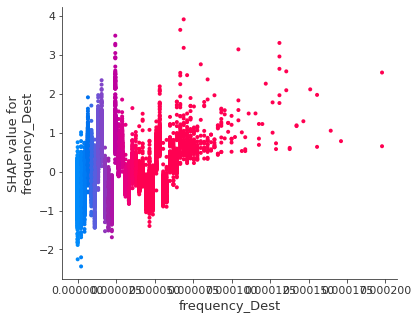

In [33]:
shap.initjs()
shap.dependence_plot(ind='frequency_Dest', 
                     interaction_index='frequency_Dest',
                     shap_values=shap_values[1], 
                     features=df_test_pre)

Two-way PDP (Partial Dependence Plot) shows the relationship between two features based on their shapley values.

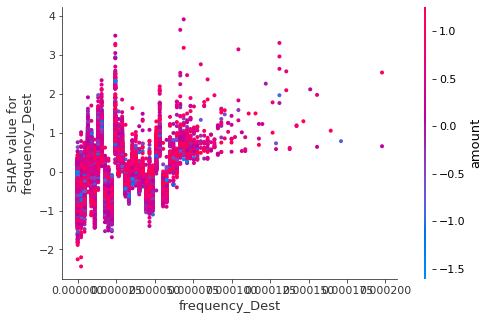

In [34]:
shap.initjs()

shap.dependence_plot(ind='frequency_Dest', interaction_index='amount',

shap_values=shap_values[1], features=df_test_pre)

<a id=6></a>
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background:#1777C4; border:0' role="tab" aria-controls="home">
<center>Deploy</center></h3>

The deployment of machine learning models is the process for making models available in production environments, where they can provide predictions to other software systems.

●One of the last stages in the Machine Learning Lifecycle.

●Potentially the most challenging stage.

●Challenges of traditional software

oReliability
oReusability
oMaintainability
oFlexibility

●Additional challenges specific to Machine Learning

oReproducibility

Needs coordination of data scientists, IT teams, software developers and business professionals:

oEnsure model works reliably
oEnsure model delivers the intended result.

●Potential discrepancy between programming language in which the model is developed and the production system language.

oRe-coding the model extends the project timeline and risks lack of reproducibility

Why is Model Deployment important?

●To start using a Machine Learning Model, it needs to be effectively deployed into production, so that they can provide predictions to other software systems.

●To maximize the value of the Machine Learning Model, we need to be able to reliably extract the predictions and share them with other systems.

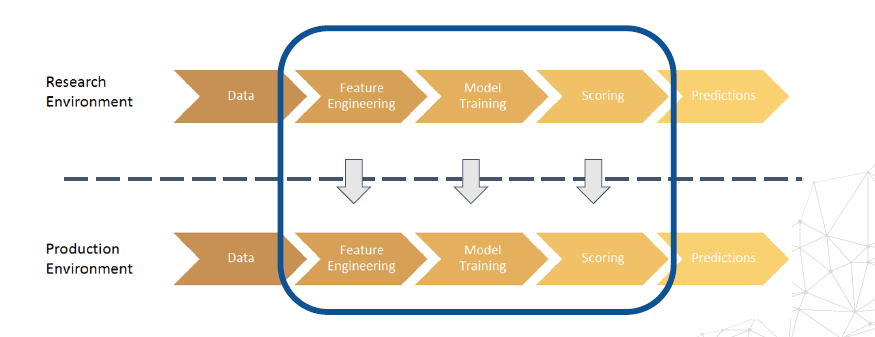

**Research Environment**

●The Research Environment is a setting with tools, programs and software suitable for data analysis and the development of machine learning models.

●Here, we develop the Machine Learning Models and identify their value.
Its done by a data scientist : i prefer work on jupyter for this phase .

**Production Environment**

●The Production Environment is a real-time setting with running programs and hardware setups that allow the organization’s daily operations.

●It’s the place where the machine learning models is actually available for business use.

●It allows organisations to show clients a “live” service.
This job is done by solid sofware+ml engineer+ devops team

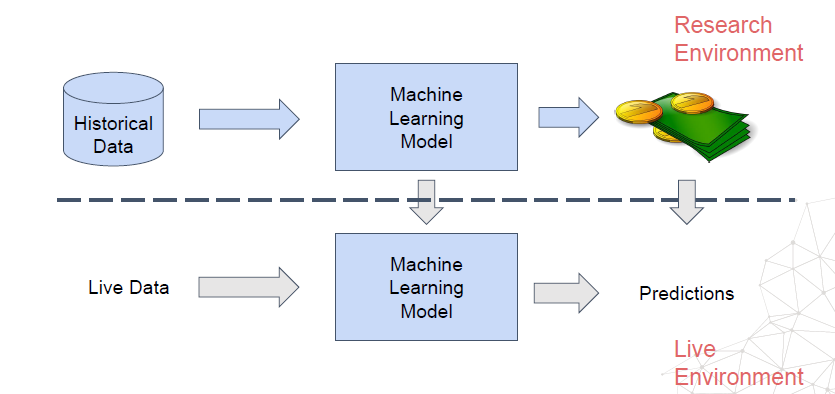

we have 4 ways to deploy models .
ML System Architectures:
1. Model embedded in application
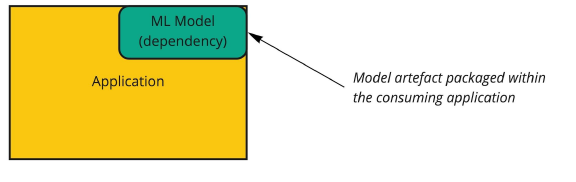
2. Served via a dedicated service
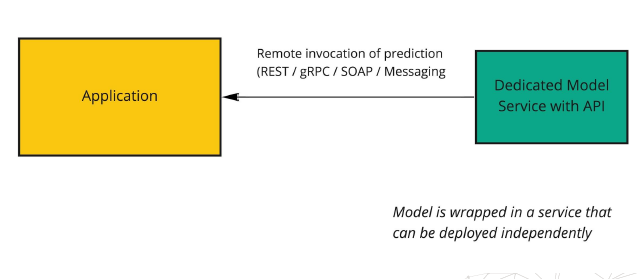
3. Model published as data(streaming)
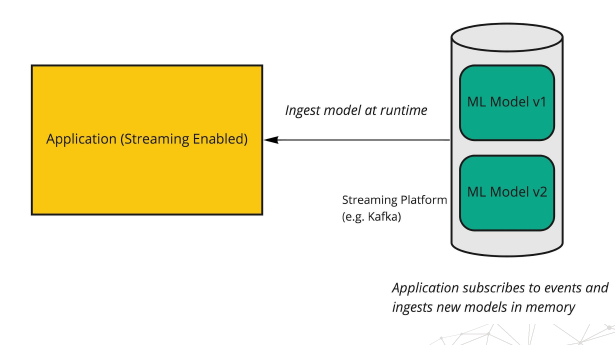
4. Batch prediction (offline process)
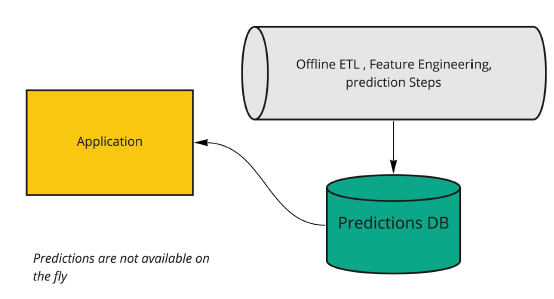

I developed  a baseline how to deploy model using Fastapi+docker on herokou :

https://github.com/DeepSparkChaker/FraudDetection_Fastapi

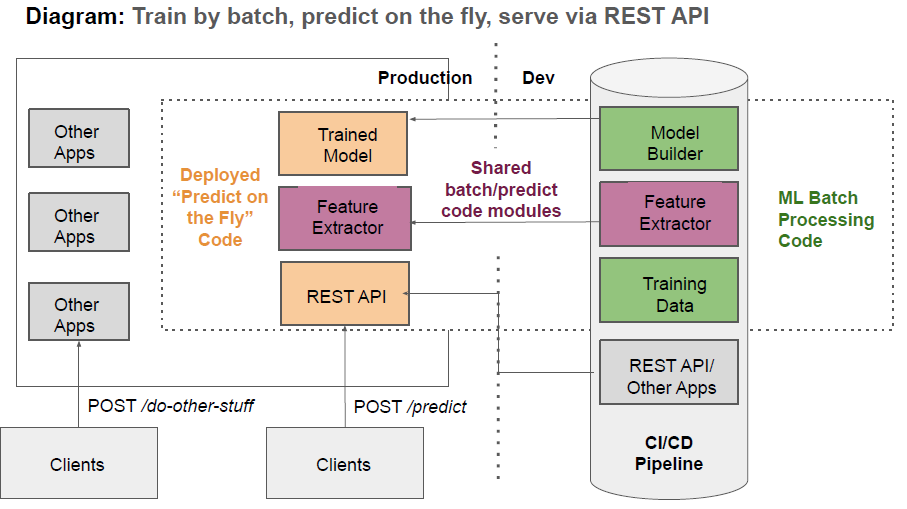
Complete deployment of our model after saving best models with best params : 


<a id=7></a>
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background:#1777C4; border:0' role="tab" aria-controls="home">
<center>Summary</center></h3> 

We had developed end-to-end machine learning using the CRISP_DM methodology. Work still in progress. Always keep in mind that the data science / ML project must be done as a team and iteratively in order to properly exploit our data and add value to our business. Also keep in mind that AI helps you make the decision by using the added value extracted from the data but not the accountability. So we have to keep in mind to always use a composite AI in order to make the final decision.
Don't forgot to upvote if you find it useful .

https://www.kaggle.com/bannourchaker/frauddetection-part3-modeling2-selectbestmodel?scriptVersionId=81276811

for complete deployement baseline see : 

https://github.com/DeepSparkChaker/FraudDetection_Fastapi

References :

https://developer.nvidia.com/blog/leveraging-machine-learning-to-detect-fraud-tips-to-developing-a-winning-kaggle-solution/

python guidline : 

https://gist.github.com/sloria/7001839

features  selections :

https://www.kaggle.com/sz8416/6-ways-for-feature-selection

https://pub.towardsai.net/feature-selection-and-removing-in-machine-learning-dd3726f5865c

https://www.kaggle.com/bannourchaker/1-featuresengineer-selectionpart1?scriptVersionId=72906910

Cripspdm :
https://www.kaggle.com/bannourchaker/4-featureengineer-featuresselectionpart4?scriptVersionId=73374083

Quanrile transformer : 

https://machinelearningmastery.com/quantile-transforms-for-machine-learning/

Best link for all : 

https://neptune.ai/blog/tabular-data-binary-classification-tips-and-tricks-from-5-kaggle-competitions

complete guide Stacking :

https://www.analyticsvidhya.com/blog/2021/08/ensemble-stacking-for-machine-learning-and-deep-learning/

https://neptune.ai/blog/ensemble-learning-guide

https://www.kaggle.com/prashant111/adaboost-classifier-tutorial


Missing : 

https://www.kaggle.com/dansbecker/handling-missing-values

Binning : 

https://heartbeat.fritz.ai/hands-on-with-feature-engineering-techniques-variable-discretization-7deb6a5c6e27

https://www.analyticsvidhya.com/blog/2020/10/getting-started-with-feature-engineering/

Cat :

https://innovation.alteryx.com/encode-smarter/

https://github.com/alteryx/categorical_encoding/blob/main/guides/notebooks/categorical-encoding-guide.ipynb

https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/

https://maxhalford.github.io/blog/target-encoding/


Choice of kmeans : 

https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/

Imputation : 

https://machinelearningmastery.com/knn-imputation-for-missing-values-in-machine-learning/

https://machinelearningmastery.com/iterative-imputation-for-missing-values-in-machine-learning/

Choice of  roc vs precssion_recall : 

https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/


https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/


How to tune for he futur work : 

https://www.kaggle.com/hamidrezabakhtaki/xgboost-catboost-lighgbm-optuna-final-submission

https://www.kaggle.com/bextuychiev/lgbm-optuna-hyperparameter-tuning-w-understanding



Deploy:

https://towardsdatascience.com/from-jupyter-notebook-to-deployment-a-straightforward-example-1838c203a437

 https://github.com/DeepSparkChaker/Titanic_Deep_Spark/blob/main/app.py
https://github.com/Kunal-Varma/Deployment-of-ML-model-using-FASTAPI/tree/2cc0319abbec469010a5139f460004f2a75a7482
https://realpython.com/fastapi-python-web-apis/
 https://github.com/tiangolo/fastapi/issues/3373
 https://www.freecodecamp.org/news/data-science-and-machine-learning-project-house-prices/
https://github.com/tiangolo/fastapi/issues/1616
https://stackoverflow.com/questions/68244582/display-dataframe-as-fastapi-output
https://www.kaggle.com/sakshigoyal7/credit-card-customers
https://github.com/renanmouraf/data-science-house-prices    
https://towardsdatascience.com/data-science-quick-tips-012-creating-a-machine-learning-inference-api-with-fastapi-bb6bcd0e6b01
https://towardsdatascience.com/how-to-build-and-deploy-a-machine-learning-model-with-fastapi-64c505213857
https://analyticsindiamag.com/complete-hands-on-guide-to-fastapi-with-machine-learning-deployment/

https://github.com/shaz13/katana/blob/develop/Dockerfile


https://github.com/TripathiAshutosh/FastAPI/blob/main/main.py

Best practices : 
    
https://theaisummer.com/best-practices-deep-learning-code/    
https://github.com/The-AI-Summer/Deep-Learning-In-Production/tree/master/2.%20Writing%20Deep%20Learning%20code:%20Best%20Practises

 Docker :
 
 https://towardsdatascience.com/docker-in-pieces-353525ec39b0?fbclid=IwAR102sks2L0vRTde2qz1g4I4NhqXxnoqfV4IFzmZke4DvGcuiuYhj25eVSY
 
https://github.com/dkhundley/ds-quick-tips/blob/master/012_dockerizing_fastapi/Dockerfile


 Deploy + scaling :
https://towardsdatascience.com/deploying-ml-models-in-production-with-fastapi-and-celery-7063e539a5db
https://github.com/jonathanreadshaw/ServingMLFastCelery

https://github.com/trainindata/deploying-machine-learning-models/blob/aaeb3e65d0a58ad583289aaa39b089f11d06a4eb/section-04-research-and-development/07-feature-engineering-pipeline.ipynb

Ml OPS : 
https://www.linkedin.com/posts/vipulppatel_getting-started-with-mlops-21-page-tutorial-activity-6863895411837415424-dWMh/?fbclid=IwAR3Y4clbzujS_s2FFWg3tTYMKaGhh3vo25NUyoVdKHAJ7zynmCTNtzlHQ4M

https://towardsai.net/p/machine-learning/mlops-demystified?utm_source=twitter&utm_medium=social&utm_campaign=rop-content-recycle&fbclid=IwAR3MimsSXCFq3GqiLKoaQqXbeb3bkSwKhSkfQSKT_c1gsHDMGSBAv63s7Po
https://www.youtube.com/watch?v=9I8X-3HIErc

https://pub.towardsai.net/deployment-ml-ops-guide-series-2-69d4a13b0dcf

Publish to medium : 

https://towardsai.net/p/data-science/how-to-publish-a-jupyter-notebook-as-a-medium-blogpost?utm_source=twitter&utm_medium=social&utm_campaign=rop-content-recycle&fbclid=IwAR2-an7kknO3bsI5xjRdjL3jiwuPy7MBN5lVBc6fzx15mGY2iLS5KndCYWc

